Face Detection using opencv


In [142]:
import cv2 as cv

imgPath = r'C:\Users\mynam\Documents\opencvPython\images.jpg'

In [143]:
img = cv.imread(imgPath, 0)
img.shape

(225, 225)

In [144]:
grayScaleImage = cv.cvtColor(img, cv.COLOR_GRAY2RGB)


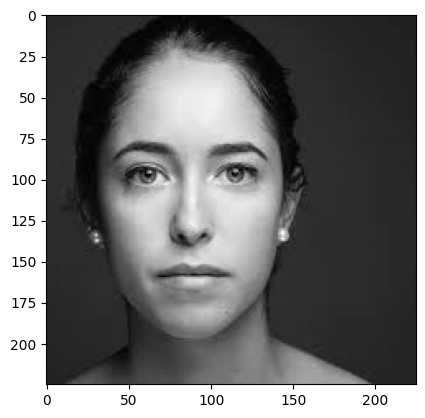

In [145]:
import matplotlib.pyplot as plt
plt.imshow(grayScaleImage)

In [146]:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + "haarcascade_frontalface_default.xml"
)


In [147]:
face = face_classifier.detectMultiScale(
    grayScaleImage, scaleFactor=1.1, minNeighbors=4, minSize=(50, 50)
)


In [148]:
for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0, 4))

In [149]:
img_rgb = cv.cvtColor(img, cv.COLOR_RGB2BGR)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

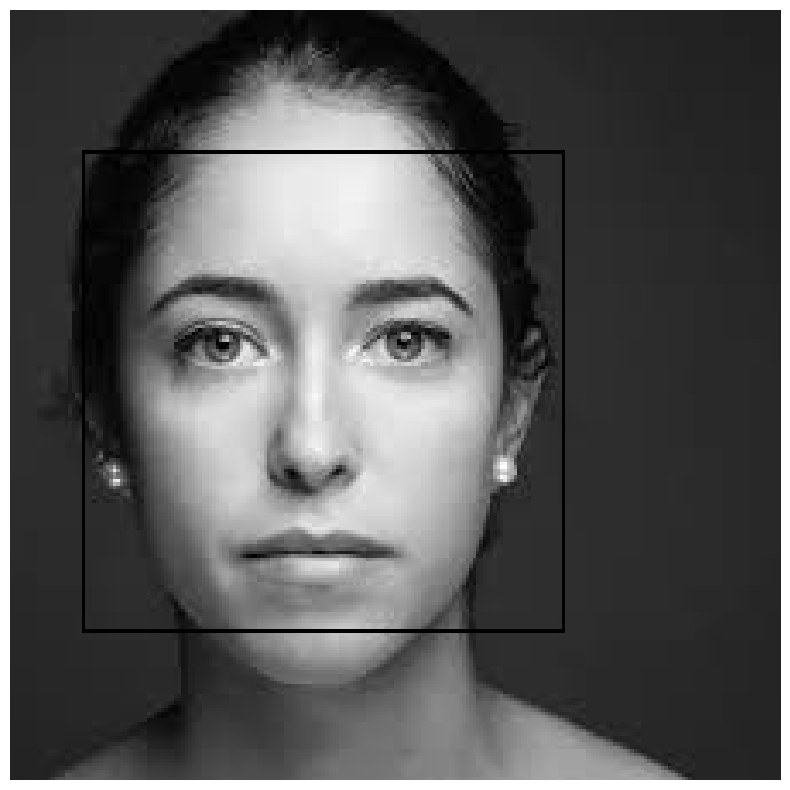

In [150]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

Live Camera Face Detection

In [151]:
video_capture = cv.VideoCapture(0)

In [152]:
def detect_bounding_box(vid):
    gray_image = cv.cvtColor(vid, cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv.circle(vid, (x+w // 2, y+h//2), (w//2), (255,255,255), 2)
    return faces

In [153]:
while True:

    result, video_frame = video_capture.read()  
    if result is False:
        break 

    faces = detect_bounding_box(video_frame)  

    cv.imshow(
        "Live Camera", video_frame
    )  

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv.destroyAllWindows()